In [3]:
import pandas as pd
pd.set_option('display.max_rows', None)  # or 1000


# RQ 1 Real data

In [1]:
# COMBINE TABLES

import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path += ['../src/', '../config/']
from data_loaders import load_directed_graph
sns.set(style="whitegrid")

compute_bound = True


# 1. Lipschitz bounds * 2 (due to propagation of error see proposition)
D_bound = lambda G, error: 2 * (1 + max(dict(G.degree()).values())) * error # max of the sum of the in and out
P_bound = lambda _G, error: 2 * 2 * error
PD_bound = lambda _G, error: 2 * 1 * error
bound_functions = {'P': P_bound, 'PD': PD_bound, 'D': D_bound}



# 2. Build unique dataframe
dataframes = []
for recmethod in ("gsignal", "labelprop", "gnn", "random"):
    # 2.1 Paths
    path = f"/data/big/fcinus/QED/data/processed-{recmethod}/"
    file_pattern = path + "*-real-data-*.csv"
    files = glob.glob(file_pattern)
    
    for file in files:
        df = pd.read_csv(file)
        assert df.network_name.nunique() == 1, "Only one network please"
        # 1.1 Formatting
        df['method'] = df['method'].apply(lambda x: x.replace("_", " "))
        df['recmethod'] = recmethod
        # 1.2. Lipschitz bounds * 2 (due to propagation of error see proposition)
        D_bound = lambda G, error: 2 * (1 + max(dict(G.degree()).values())) * error # max of the sum of the in and out
        P_bound = lambda _G, error: 2 * 2 * error
        PD_bound = lambda _G, error: 2 * 1 * error
        bound_functions = {
            'P': P_bound,
            'PD': PD_bound,
            'D': D_bound
        }
        if compute_bound:
            import sys
            sys.path += ['../src/', '../config/']
            from generative_graph_models import define_graph_instance
            __A_eq, graph, __L_eq = define_graph_instance(df.network_name.unique()[0], kwargs={}, directed=True)
            df['bound'] = df.apply(lambda row: bound_functions[row['obj_name']](graph, row['reconstr_error']), axis=1)
        dataframes.append(df)

# 2. Combine DFs
combined_df = pd.concat(dataframes, ignore_index=True)


Loading vaxNoVax follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 15736
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 11760
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 11636
Graph is directed True,  |V|=11_632,  |E|=1_599_220


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading referendum follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 2894
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 2485
Graph is directed True,  |V|=2_479,  |E|=154_831


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading referendum follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 2894
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 2485
Graph is directed True,  |V|=2_479,  |E|=154_831


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading brexit follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 7589
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 7282
Graph is directed True,  |V|=7_281,  |E|=530_607


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading brexit follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 7589
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 7282
Graph is directed True,  |V|=7_281,  |E|=530_607


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading vaxNoVax follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 15736
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 11760
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 11636
Graph is directed True,  |V|=11_632,  |E|=1_599_220


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading referendum follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 2894
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 2485
Graph is directed True,  |V|=2_479,  |E|=154_831


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading brexit follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 7589
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 7282
Graph is directed True,  |V|=7_281,  |E|=530_607


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading vaxNoVax follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 15736
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 11760
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 11636
Graph is directed True,  |V|=11_632,  |E|=1_599_220


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading referendum follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 2894
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 2485
Graph is directed True,  |V|=2_479,  |E|=154_831


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading brexit follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 7589
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 7282
Graph is directed True,  |V|=7_281,  |E|=530_607


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


In [25]:
COLUMNS = ['obj_name', 'recmethod', 'network_name', 'method']
for col in COLUMNS:
    print(combined_df[col].unique())
combined_df[(combined_df.method=='degree')&(combined_df.obj_name=='PD')].groupby(COLUMNS).agg({'time_sec': ['mean']}).reset_index()[['recmethod', 'network_name', 'time_sec']]

['PD' 'D' 'P']
['gsignal' 'labelprop' 'gnn']
['vaxNoVax' 'referendum' 'brexit']
['random' 'degree' 'closeness centrality' 'pagerank']


,recmethod,network_name,time_sec
,,,mean
0,gnn,brexit,231.640813
1,gnn,referendum,26.237231
2,gnn,vaxNoVax,685.951885
3,gsignal,brexit,768.036489
4,gsignal,referendum,40.505683
5,gsignal,vaxNoVax,680.712777
6,labelprop,brexit,1431.455650
7,labelprop,referendum,174.620448
8,labelprop,vaxNoVax,4213.616771


In [8]:
# 4. Params
save = True
method = 'degree'


# 5 Build display of tables
# Function to format the error values
def format_error3(mean): return f"\\({mean:.2f}\\)"
def format_error0(mean): return f"\\({mean:.0f}\\)"

columns = ['network_name', 'network_nodes', "obj_name", 
           "relative_optimization_error", 
           "optimization_error", "bound", "recmethod"]


# 6. Appendix (uniform) and main config (polarized)
_ = combined_df[(combined_df.method==method)][columns]


# 6.1 Create new columns with formatted error values
_['Absolute Error'] = _.apply(lambda row: format_error0(row['optimization_error']), axis=1)
_['Multiplicative Error'] = _.apply(lambda row: format_error3(row['relative_optimization_error']), axis=1)
_.rename(columns={"obj_name": "objective", "network_name": "network", "network_nodes": "|V|", "recmethod": "Rec Method"}, inplace=True)

# 6.2 Pivot the DataFrame to the desired format
table = _.pivot_table(
    index=['objective', 'network', '|V|'],
    columns='Rec Method',
    values=['Absolute Error', 'Multiplicative Error'],
    aggfunc='first'
)

# 6.3 Sort the DataFrame by 'objective' and then by '$|V|$'
custom_order = ['P', 'D', 'PD'] # Define custom order for 'objective' column
table_reset = table.reset_index() # Reset index to make 'objective' a column
table_reset['objective'] = pd.Categorical(table_reset['objective'], categories=custom_order, ordered=True) # Define the 'objective' column as a categorical
table_sorted = table_reset.sort_values(by=['objective', '|V|']) # Sort the DataFrame by 'objective' and then by '$|V|$'
table_sorted.set_index(['objective', 'network', '|V|'], inplace=True) # Set the index back to the original state

# 6.4 Format for latex conversion
display(table_sorted)

# 6.5 Save
if save:
    column_format = "|".join(["c"] * (len(table.columns.levels[0]) * len(table.columns.levels[1]) + 3))  # +3 for the index columns (objective, network, $|V|$)
    # Generate LaTeX code
    latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)
    filename = f"REAL-DATA-OPTIMIZATION-all-recmethods-method_{method}"
    with open(f'../draft/tables/{filename}.tex', 'w') as f:
        f.write(latex_code)


Absolute Error                      \
Rec Method                            gnn   gsignal labelprop   
objective network    |V|                                        
P         referendum 2479         \(183\)   \(748\)   \(124\)   
          brexit     7281        \(1034\)  \(1252\)   \(715\)   
          vaxNoVax   11632       \(1401\)  \(2242\)   \(672\)   
D         referendum 2479         \(113\)   \(122\)    \(48\)   
          brexit     7281         \(893\)   \(822\)   \(581\)   
          vaxNoVax   11632        \(956\)   \(793\)   \(360\)   
PD        referendum 2479         \(186\)   \(570\)   \(154\)   
          brexit     7281         \(784\)   \(851\)   \(491\)   
          vaxNoVax   11632       \(1358\)  \(1619\)   \(667\)   

                           Multiplicative Error                      
Rec Method                                  gnn   gsignal labelprop  
objective network    |V|                                             
P         referendum 2479              \(1.33\)  \(2.35\)  \(1.22\)  
          brexit     7281              \(2.09\)  \(2.32\)  \(1.76\)  
          vaxNoVax   11632             \(1.85\)  \(2.36\)  \(1.41\)  
D         referendum 2479              \(1.99\)  \(2.07\)  \(1.42\)  
          brexit     7281              \(2.66\)  \(2.53\)  \(2.08\)  
          vaxNoVax   11632             \(2.16\)  \(1.96\)  \(1.44\)  
PD        referendum 2479              \(1.19\)  \(1.58\)  \(1.16\)  
          brexit     7281              \(1.31\)  \(1.33\)  \(1.19\)  
          vaxNoVax   11632             \(1.33\)  \(1.39\)  \(1.16\)

-------

# RQ 2- Directed Networks

In [2]:
# COMBINE TABLES

import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path += ['../src/', '../config/']
from data_loaders import load_directed_graph
sns.set(style="whitegrid")


# 1. Lipschitz bounds * 2 (due to propagation of error see proposition)
D_bound = lambda G, error: 2 * (1 + max(dict(G.degree()).values())) * error # max of the sum of the in and out
P_bound = lambda _G, error: 2 * 2 * error
PD_bound = lambda _G, error: 2 * 1 * error
bound_functions = {'P': P_bound, 'PD': PD_bound, 'D': D_bound}

format_names = lambda x: x.replace("directed/", "").replace("_", " ").replace("out.", "").replace("moreno", "").replace("librec", "").lstrip(' .').lstrip(' -')


# 2. Build unique dataframe
dataframes = []
for recmethod in ("gsignal", "labelprop", "gnn", "random"):
    # 2.1 Paths
    path = f"/data/big/fcinus/QED/data/processed-{recmethod}/"
    file_pattern = path + "*-directed-*.csv"
    files = glob.glob(file_pattern)
    
    for file in files:
        df = pd.read_csv(file)
        assert df.network_name.nunique() == 1, "Only one network please"
        graph = load_directed_graph(f"../data/raw/{df.network_name.unique()[0]}")
        df['bound'] = df.apply(lambda row: bound_functions[row['obj_name']](graph, row['reconstr_error']), axis=1)
        grouped = df.groupby(['network_name', 'network_nodes','obj_name', 'opinion_model', 'polarization', 'n_frequencies', 'n_sensors', 'method']).agg({
            'max_λ': ['mean', 'std'],
            'relative_optimization_error': ['mean', 'std'],
            'bound': ['mean', 'std'],
            'optimization_error': ['mean', 'std']
        }).reset_index()

        grouped.columns = ['network_name', 'network_nodes', 'obj_name', 'opinion_model', 'polarization', 'n_frequencies', 'n_sensors', 'method',
                        'max_λ_mean', 'max_λ_std',
                        'relative_optimization_error_mean', 'relative_optimization_error_std',
                        'bound_mean', 'bound_std',
                        'optimization_error_mean', 'optimization_error_std']

        # 2.2 Formatting
        grouped['method'] = grouped['method'].apply(lambda x: x.replace("_", " "))
        grouped.network_name = grouped.network_name.apply(format_names)
        grouped['recmethod'] = recmethod
        dataframes.append(grouped)

# 3. Combine DFs
combined_df = pd.concat(dataframes, ignore_index=True)


In [9]:
# 4. Params
save = False
method = 'degree'


# 5 Build display of tables
# Function to format the error values
def format_error3(mean, std): return f"\\({mean:.2f} \\pm {std:.2f}\\)"
def format_error0(mean, std): return f"\\({mean:.0f} \\pm {std:.0f}\\)"

columns = ['network_name', 'network_nodes', "obj_name", 
           "relative_optimization_error_mean", "relative_optimization_error_std", 
           "optimization_error_mean", "optimization_error_std", "bound_mean", "recmethod"]


# 6. Appendix (uniform) and main config (polarized)
for opinions, pol in [("uniform", 1), ("gaussian", 3)]:
    _ = combined_df[(combined_df.opinion_model==opinions)&(combined_df.polarization==pol)&(combined_df.method==method)][columns]


    # 6.1 Create new columns with formatted error values
    _['Absolute Error'] = _.apply(lambda row: format_error0(row['optimization_error_mean'], row['optimization_error_std']), axis=1)
    _['Multiplicative Error'] = _.apply(lambda row: format_error3(row['relative_optimization_error_mean'], row['relative_optimization_error_std']), axis=1)
    _.rename(columns={"obj_name": "objective", "network_name": "network", "network_nodes": "|V|", "recmethod": "Rec Method"}, inplace=True)

    _ = _[_["Rec Method"]=="random"] # SELECT METHOD TO PLOT

    # 6.2 Pivot the DataFrame to the desired format
    table = _.pivot_table(
        index=['objective', 'network', ],#'|V|'],
        columns='Rec Method',
        values=['Multiplicative Error'],#values=['Absolute Error', 'Multiplicative Error'],
        aggfunc='first'
    )

    # 6.3 Sort the DataFrame by 'objective' and then by '$|V|$'
    custom_order = ['P', 'D', 'PD'] # Define custom order for 'objective' column
    table_reset = table.reset_index() # Reset index to make 'objective' a column
    table_reset['objective'] = pd.Categorical(table_reset['objective'], categories=custom_order, ordered=True) # Define the 'objective' column as a categorical
    table_sorted = table_reset.sort_values(by=['objective',]) #'|V|']) # Sort the DataFrame by 'objective' and then by '$|V|$'
    table_sorted.set_index(['objective', 'network'], inplace=True) #'|V|'], inplace=True) # Set the index back to the original state

    # 6.4 Format for latex conversion
    display(table_sorted)

    # 6.5 Save
    if save:
        column_format = "|".join(["c"] * (len(table.columns.levels[0]) * len(table.columns.levels[1]) + 3))  # +3 for the index columns (objective, network, $|V|$)
        # Generate LaTeX code
        latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)
        filename = f"directed-OPTIMIZATION-opinions_{opinions}-pol_{pol}-method_{method}"
        with open(f'../draft/tables/{filename}.tex', 'w') as f:
            f.write(latex_code)


Multiplicative Error
Rec Method                                    random
objective network                                   
P         health health            \(1.78 \pm 0.03\)
          wiki talk ht             \(1.28 \pm 0.19\)
          oz oz                    \(1.91 \pm 0.09\)
          innovation innovation    \(1.89 \pm 0.14\)
          highschool highschool    \(1.86 \pm 0.18\)
          filmtrust-trust          \(1.38 \pm 0.04\)
          dnc-temporalGraph        \(1.27 \pm 0.07\)
          ciaodvd-trust            \(1.71 \pm 0.04\)
D         ciaodvd-trust            \(2.01 \pm 0.05\)
          oz oz                    \(2.52 \pm 0.13\)
          innovation innovation    \(1.77 \pm 0.13\)
          highschool highschool    \(1.59 \pm 0.12\)
          health health            \(1.51 \pm 0.02\)
          filmtrust-trust          \(1.24 \pm 0.04\)
          dnc-temporalGraph        \(1.34 \pm 0.05\)
          wiki talk ht             \(1.22 \pm 0.12\)
PD        oz oz                    \(1.42 \pm 0.06\)
          ciaodvd-trust            \(1.31 \pm 0.02\)
          dnc-temporalGraph        \(1.16 \pm 0.04\)
          filmtrust-trust          \(1.18 \pm 0.03\)
          health health            \(1.32 \pm 0.01\)
          highschool highschool    \(1.36 \pm 0.09\)
          innovation innovation    \(1.36 \pm 0.06\)
          wiki talk ht             \(1.19 \pm 0.16\)

Multiplicative Error
Rec Method                                    random
objective network                                   
P         health health            \(2.08 \pm 0.07\)
          wiki talk ht             \(1.36 \pm 0.15\)
          oz oz                    \(2.92 \pm 0.14\)
          innovation innovation    \(2.46 \pm 0.22\)
          highschool highschool    \(2.26 \pm 0.34\)
          filmtrust-trust          \(1.65 \pm 0.09\)
          dnc-temporalGraph        \(1.55 \pm 0.10\)
          ciaodvd-trust            \(2.73 \pm 0.10\)
D         ciaodvd-trust            \(1.61 \pm 0.04\)
          oz oz                    \(1.97 \pm 0.13\)
          innovation innovation    \(1.82 \pm 0.16\)
          highschool highschool    \(1.54 \pm 0.18\)
          health health            \(1.48 \pm 0.06\)
          filmtrust-trust          \(1.26 \pm 0.06\)
          dnc-temporalGraph        \(1.34 \pm 0.09\)
          wiki talk ht             \(1.30 \pm 0.16\)
PD        oz oz                    \(1.74 \pm 0.08\)
          ciaodvd-trust            \(1.68 \pm 0.05\)
          dnc-temporalGraph        \(1.35 \pm 0.08\)
          filmtrust-trust          \(1.39 \pm 0.07\)
          health health            \(1.50 \pm 0.03\)
          highschool highschool    \(1.60 \pm 0.14\)
          innovation innovation    \(1.59 \pm 0.10\)
          wiki talk ht             \(1.27 \pm 0.16\)

In [11]:
column_format = "|".join(["c"] * (len(table.columns.levels[0]) * len(table.columns.levels[1]) + 3))  # +3 for the index columns (objective, network, $|V|$)
# Generate LaTeX code
latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)
print(latex_code)  

\begin{tabular}{c|c|c|c|c|c|c}
\toprule
   & {} & Multiplicative Error \\
   & Rec Method &               random \\
objective & network &                      \\
\midrule
P & health health &    \(2.08 \pm 0.07\) \\
   & wiki talk ht &    \(1.36 \pm 0.15\) \\
   & oz oz &    \(2.92 \pm 0.14\) \\
   & innovation innovation &    \(2.46 \pm 0.22\) \\
   & highschool highschool &    \(2.26 \pm 0.34\) \\
   & filmtrust-trust &    \(1.65 \pm 0.09\) \\
   & dnc-temporalGraph &    \(1.55 \pm 0.10\) \\
   & ciaodvd-trust &    \(2.73 \pm 0.10\) \\
D & ciaodvd-trust &    \(1.61 \pm 0.04\) \\
   & oz oz &    \(1.97 \pm 0.13\) \\
   & innovation innovation &    \(1.82 \pm 0.16\) \\
   & highschool highschool &    \(1.54 \pm 0.18\) \\
   & health health &    \(1.48 \pm 0.06\) \\
   & filmtrust-trust &    \(1.26 \pm 0.06\) \\
   & dnc-temporalGraph &    \(1.34 \pm 0.09\) \\
   & wiki talk ht &    \(1.30 \pm 0.16\) \\
PD & oz oz &    \(1.74 \pm 0.08\) \\
   & ciaodvd-trust &    \(1.68 \pm 0.05\) \\
   

/tmp/ipykernel_3404372/3076379304.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)


In [24]:
column_format = "|".join(["c"] * (len(table.columns.levels[0]) * len(table.columns.levels[1]) + 3))  # +3 for the index columns (objective, network, $|V|$)
# Generate LaTeX code
latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)

/tmp/ipykernel_3018980/1388180743.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)


In [25]:
latex_code

'\\begin{tabular}{c|c|c|c|c|c|c|c|c|c|c|c|c|c}\n\\toprule\n   &               & {} & \\multicolumn{4}{l}{Absolute Error} & \\multicolumn{4}{l}{Multiplicative Error} \\\\\n   &               & Rec Method &             gnn &         gsignal &       labelprop &          random &                  gnn &            gsignal &          labelprop &             random \\\\\nobjective & network & |V| &                 &                 &                 &                 &                      &                    &                    &                    \\\\\n\\midrule\nP & highschool highschool & 70   &    \\(12 \\pm 5\\) &    \\(14 \\pm 3\\) &    \\(10 \\pm 3\\) &    \\(18 \\pm 4\\) &    \\(1.87 \\pm 0.40\\) &  \\(1.97 \\pm 0.30\\) &  \\(1.68 \\pm 0.28\\) &  \\(2.26 \\pm 0.34\\) \\\\\n   & wiki talk ht & 82   &     \\(7 \\pm 4\\) &     \\(6 \\pm 3\\) &     \\(8 \\pm 6\\) &     \\(8 \\pm 4\\) &    \\(1.28 \\pm 0.18\\) &  \\(1.25 \\pm 0.13\\) &  \\(1.34 \\pm 0.27\\) &  \\(1.36 \\pm 0.15\\) \\\\

------

## RQ 5 Sampling strategies: uses previous combined_df

In [1]:
# 4. Params
save = True
recmethod = "labelprop"


# 5 Build display of tables
# Function to format the error values
def format_error3(mean, std): return f"\\({mean:.2f} \\pm {std:.2f}\\)"
def format_error0(mean, std): return f"\\({mean:.0f} \\pm {std:.0f}\\)"

columns = ['network_name', 'network_nodes', "obj_name", 
           "relative_optimization_error_mean", "relative_optimization_error_std", 
           "optimization_error_mean", "optimization_error_std", "bound_mean", "recmethod", "method"]


# 6. Appendix (uniform) and main config (polarized)
for opinions, pol in [("uniform", 1), ("gaussian", 3)]:
    _ = combined_df[(combined_df.opinion_model==opinions)&(combined_df.polarization==pol)&(combined_df.recmethod==recmethod)][columns]


    # 6.1 Create new columns with formatted error values
    _['Absolute Error'] = _.apply(lambda row: format_error0(row['optimization_error_mean'], row['optimization_error_std']), axis=1)
    _['Multiplicative Error'] = _.apply(lambda row: format_error3(row['relative_optimization_error_mean'], row['relative_optimization_error_std']), axis=1)
    _.rename(columns={"obj_name": "objective", "network_name": "network", "network_nodes": "|V|", "method": "Sel Method"}, inplace=True)

    # 6.2 Pivot the DataFrame to the desired format
    table = _.pivot_table(
        index=['objective', 'network', '|V|'],
        columns='Sel Method',
        values=['Multiplicative Error'],#values=['Absolute Error', 'Multiplicative Error'],
        aggfunc='first'
    )

    # 6.3 Sort the DataFrame by 'objective' and then by '$|V|$'
    custom_order = ['P', 'D', 'PD'] # Define custom order for 'objective' column
    table_reset = table.reset_index() # Reset index to make 'objective' a column
    table_reset['objective'] = pd.Categorical(table_reset['objective'], categories=custom_order, ordered=True) # Define the 'objective' column as a categorical
    table_sorted = table_reset.sort_values(by=['objective', '|V|']) # Sort the DataFrame by 'objective' and then by '$|V|$'
    table_sorted.set_index(['objective', 'network', '|V|'], inplace=True) # Set the index back to the original state

    # 6.4 Format for latex conversion
    display(table_sorted)

    # 6.5 Save
    if save:
        column_format = "|".join(["c"] * (len(table.columns.levels[0]) * len(table.columns.levels[1]) + 3))  # +3 for the index columns (objective, network, $|V|$)
        # Generate LaTeX code
        latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)
        filename = f"directed-STRATEGIES-opinions_{opinions}-pol_{pol}-recmethod_{recmethod}"
        with open(f'../draft/tables/{filename}.tex', 'w') as f:
            f.write(latex_code)


NameError: name 'combined_df' is not defined

--------

# RQ 3 Undirected

In [8]:
# COMBINE TABLES

import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path += ['../src/', '../config/']
from data_loaders import load_directed_graph
sns.set(style="whitegrid")


# 1. Lipschitz bounds * 2 (due to propagation of error see proposition) [UNDIRECTED]
D_bound = lambda G, error: 2 * (2 * max(dict(G.degree()).values())) * error # max of the sum of the in and out
P_bound = lambda _G, error: 2 * 2 * error
PD_bound = lambda _G, error: 2 * 2 * error
bound_functions = {
    'P': P_bound,
    'PD': PD_bound,
    'D': D_bound
}
D_bound_mul = lambda G, rel_error: 1 + (2 * max(dict(G.degree()).values())) * 2 * rel_error # max of the sum of the in and out
P_bound_mul = lambda _G, rel_error: 1 + 2 * 2 * rel_error
PD_bound_mul = lambda _G, rel_error: 1 + 2 * 2 * rel_error
bound_functions_multiplicative = {
    'P': P_bound_mul,
    'PD': PD_bound_mul,
    'D': D_bound_mul
}

format_names = lambda x: x.replace("directed/", "").replace("_", " ").replace("out.", "").replace("moreno", "").replace("librec", "").lstrip(' .').lstrip(' -')


# 2. Build unique dataframe
dataframes = []
for recmethod in ("gsignal", "labelprop", "gnn"):
    # 2.1 Paths
    path = f"/data/big/fcinus/QED/data/processed-{recmethod}/"
    file_pattern = path + "*-undirected-*.csv"
    files = glob.glob(file_pattern)
    
    for file in files:
        df = pd.read_csv(file)
        assert df.network_name.nunique() == 1, "Only one network please"
        graph = load_directed_graph(f"../data/raw/{df.network_name.unique()[0]}")
        df['bound'] = df.apply(lambda row: bound_functions[row['obj_name']](graph, row['reconstr_error']), axis=1)
        df['rel_rec_opt_error'] = df['reconstr_error'] / df['best_obj'] # ||s - s_hat|| / f(L_opt)
        df['bound_multiplicative'] = df.apply(lambda row: bound_functions_multiplicative[row['obj_name']](graph, row['rel_rec_opt_error']), axis=1)
        grouped = df.groupby(['network_name', 'network_nodes','obj_name', 'opinion_model', 'polarization', 'n_frequencies', 'n_sensors', 'method']).agg({
            'max_λ': ['mean', 'std'],
            'relative_optimization_error': ['mean', 'std'],
            'bound': ['mean', 'std'],
            'bound_multiplicative': ['mean', 'std'],
            'optimization_error': ['mean', 'std']
        }).reset_index()

        grouped.columns = ['network_name', 'network_nodes', 'obj_name', 'opinion_model', 'polarization', 'n_frequencies', 'n_sensors', 'method',
                        'max_λ_mean', 'max_λ_std',
                        'relative_optimization_error_mean', 'relative_optimization_error_std',
                        'bound_mean', 'bound_std',
                        'bound_multiplicative_mean', 'bound_multiplicative_std',
                        'optimization_error_mean', 'optimization_error_std']

        # 2.2 Formatting
        grouped['method'] = grouped['method'].apply(lambda x: x.replace("_", " "))
        grouped.network_name = grouped.network_name.apply(format_names)
        grouped['recmethod'] = recmethod
        dataframes.append(grouped)

# 3. Combine DFs
combined_df = pd.concat(dataframes, ignore_index=True)


In [9]:
# 4. Params
save = True
method = 'degree'


# 5 Build display of tables
# Function to format the error values
def format_error3(mean, std, bound_mul_mean): return f"\\({mean:.2f} \\pm {std:.2f} \:\: ({bound_mul_mean:.0f})\\)"
def format_error2(mean, std, bound_mean): return f"\\({mean:.2f} \\pm {std:.2f} \:\: ({bound_mean:.0f})\\)"

columns = ['network_name', 'network_nodes', "obj_name", 
           "relative_optimization_error_mean", "relative_optimization_error_std", 
           "optimization_error_mean", "optimization_error_std", "bound_mean", "bound_multiplicative_mean", "recmethod"]


# 6. Appendix (uniform) and main config (polarized)
for opinions, pol in [("uniform", 1), ("gaussian", 3)]:
    _ = combined_df[(combined_df.opinion_model==opinions)&(combined_df.polarization==pol)&(combined_df.method==method)][columns]


    # 6.1 Create new columns with formatted error values
    _['Absolute Error  (Bound)'] = _.apply(lambda row: format_error2(row['optimization_error_mean'], row['optimization_error_std'], row['bound_mean']), axis=1)
    _['Multiplicative Error'] = _.apply(lambda row: format_error3(row['relative_optimization_error_mean'], row['relative_optimization_error_std'], row['bound_multiplicative_mean']), axis=1)
    _.rename(columns={"obj_name": "objective", "network_name": "network", "network_nodes": "|V|", "recmethod": "Rec Method"}, inplace=True)

    # 6.2 Pivot the DataFrame to the desired format
    table = _.pivot_table(
        index=['objective', 'network', '|V|'],
        columns='Rec Method',
        values=['Absolute Error  (Bound)', 'Multiplicative Error'],
        aggfunc='first'
    )

    # 6.3 Sort the DataFrame by 'objective' and then by '$|V|$'
    custom_order = ['P', 'D', 'PD'] # Define custom order for 'objective' column
    table_reset = table.reset_index() # Reset index to make 'objective' a column
    table_reset['objective'] = pd.Categorical(table_reset['objective'], categories=custom_order, ordered=True) # Define the 'objective' column as a categorical
    table_sorted = table_reset.sort_values(by=['objective', '|V|']) # Sort the DataFrame by 'objective' and then by '$|V|$'
    table_sorted.set_index(['objective', 'network', '|V|'], inplace=True) # Set the index back to the original state

    # 6.4 Format for latex conversion
    display(table_sorted)

    # 6.5 Save
    if save:
        column_format = "|".join(["c"] * (len(table.columns.levels[0]) * len(table.columns.levels[1]) + 3))  # +3 for the index columns (objective, network, $|V|$)
        # Generate LaTeX code
        latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)
        filename = f"undirected-OPTIMIZATION-opinions_{opinions}-pol_{pol}-method_{method}"
        with open(f'../draft/tables/{filename}.tex', 'w') as f:
            f.write(latex_code)


Absolute Error  (Bound)  \
Rec Method                                                        gnn   
objective network                   |V|                                 
PD        unucidata-zachary         34    \(8.46 \pm 2.26 \:\: (29)\)   
          un beach beach            43    \(1.14 \pm 0.74 \:\: (27)\)   
          un train train            64   \(10.21 \pm 2.83 \:\: (37)\)   
          unmit                     96    \(0.00 \pm 0.00 \:\: (46)\)   
          unsociopatterns-hypertext 113   \(1.13 \pm 1.66 \:\: (49)\)   
          undimacs10-football       115  \(21.11 \pm 3.87 \:\: (50)\)   

                                                                       \
Rec Method                                                    gsignal   
objective network                   |V|                                 
PD        unucidata-zachary         34    \(5.58 \pm 2.13 \:\: (32)\)   
          un beach beach            43    \(2.15 \pm 1.20 \:\: (33)\)   
          un train train            64   \(11.51 \pm 4.04 \:\: (44)\)   
          unmit                     96    \(0.00 \pm 0.00 \:\: (52)\)   
          unsociopatterns-hypertext 113   \(2.27 \pm 2.09 \:\: (57)\)   
          undimacs10-football       115  \(21.03 \pm 4.82 \:\: (57)\)   

                                                                       \
Rec Method                                                  labelprop   
objective network                   |V|                                 
PD        unucidata-zachary         34    \(8.43 \pm 2.88 \:\: (31)\)   
          un beach beach            43    \(1.23 \pm 1.09 \:\: (21)\)   
          un train train            64   \(12.92 \pm 3.62 \:\: (38)\)   
          unmit                     96    \(0.00 \pm 0.00 \:\: (32)\)   
          unsociopatterns-hypertext 113   \(2.26 \pm 3.29 \:\: (41)\)   
          undimacs10-football       115  \(23.83 \pm 4.63 \:\: (46)\)   

                                                    Multiplicative Error  \
Rec Method                                                           gnn   
objective network                   |V|                                    
PD        unucidata-zachary         34       \(3.70 \pm 0.78 \:\: (10)\)   
          un beach beach            43      \(6.67 \pm 4.12 \:\: (138)\)   
          un train train            64       \(3.64 \pm 1.18 \:\: (11)\)   
          unmit                     96    \(0.99 \pm 0.03 \:\: (10763)\)   
          unsociopatterns-hypertext 113  \(25.80 \pm 40.15 \:\: (1070)\)   
          undimacs10-football       115      \(6.31 \pm 1.12 \:\: (14)\)   

                                                                          \
Rec Method                                                       gsignal   
objective network                   |V|                                    
PD        unucidata-zachary         34       \(2.74 \pm 0.59 \:\: (11)\)   
          un beach beach            43     \(10.93 \pm 5.12 \:\: (166)\)   
          un train train            64       \(3.84 \pm 1.07 \:\: (12)\)   
          unmit                     96    \(1.00 \pm 0.01 \:\: (12132)\)   
          unsociopatterns-hypertext 113  \(48.18 \pm 43.23 \:\: (1228)\)   
          undimacs10-football       115      \(6.25 \pm 1.20 \:\: (15)\)   

                                                                         
Rec Method                                                    labelprop  
objective network                   |V|                                  
PD        unucidata-zachary         34      \(3.67 \pm 0.92 \:\: (11)\)  
          un beach beach            43     \(7.37 \pm 7.12 \:\: (104)\)  
          un train train            64      \(4.24 \pm 1.17 \:\: (11)\)  
          unmit                     96    \(1.00 \pm 0.02 \:\: (7432)\)  
          unsociopatterns-hypertext 113  \(53.12 \pm 90.66 \:\: (909)\)  
          undimacs10-football       115     \(7.00 \pm 1.33 \:\: (13)\)

/tmp/ipykernel_3151136/29673461.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)


Absolute Error  (Bound)  \
Rec Method                                                        gnn   
objective network                   |V|                                 
PD        unucidata-zachary         34    \(2.35 \pm 0.83 \:\: (18)\)   
          un beach beach            43    \(0.32 \pm 0.02 \:\: (17)\)   
          un train train            64    \(3.06 \pm 0.70 \:\: (18)\)   
          unmit                     96    \(0.00 \pm 0.00 \:\: (41)\)   
          unsociopatterns-hypertext 113   \(0.73 \pm 0.51 \:\: (41)\)   
          undimacs10-football       115  \(12.62 \pm 4.87 \:\: (25)\)   

                                                                       \
Rec Method                                                    gsignal   
objective network                   |V|                                 
PD        unucidata-zachary         34    \(4.97 \pm 1.47 \:\: (26)\)   
          un beach beach            43    \(0.80 \pm 0.19 \:\: (24)\)   
          un train train            64   \(11.52 \pm 2.62 \:\: (43)\)   
          unmit                     96    \(0.00 \pm 0.00 \:\: (52)\)   
          unsociopatterns-hypertext 113   \(1.79 \pm 3.83 \:\: (50)\)   
          undimacs10-football       115  \(18.19 \pm 7.73 \:\: (33)\)   

                                                                       \
Rec Method                                                  labelprop   
objective network                   |V|                                 
PD        unucidata-zachary         34    \(2.41 \pm 0.64 \:\: (24)\)   
          un beach beach            43    \(0.33 \pm 0.04 \:\: (18)\)   
          un train train            64    \(5.63 \pm 1.90 \:\: (33)\)   
          unmit                     96    \(0.00 \pm 0.00 \:\: (39)\)   
          unsociopatterns-hypertext 113   \(2.69 \pm 3.84 \:\: (38)\)   
          undimacs10-football       115  \(10.52 \pm 3.75 \:\: (25)\)   

                                                  Multiplicative Error  \
Rec Method                                                         gnn   
objective network                   |V|                                  
PD        unucidata-zachary         34      \(1.69 \pm 0.29 \:\: (7)\)   
          un beach beach            43     \(2.22 \pm 0.16 \:\: (67)\)   
          un train train            64      \(1.46 \pm 0.13 \:\: (4)\)   
          unmit                     96   \(1.07 \pm 0.11 \:\: (9540)\)   
          unsociopatterns-hypertext 113  \(12.90 \pm 8.47 \:\: (681)\)   
          undimacs10-football       115     \(2.11 \pm 0.53 \:\: (3)\)   

                                                                         \
Rec Method                                                      gsignal   
objective network                   |V|                                   
PD        unucidata-zachary         34       \(2.40 \pm 0.36 \:\: (9)\)   
          un beach beach            43      \(4.03 \pm 0.70 \:\: (94)\)   
          un train train            64       \(2.69 \pm 0.41 \:\: (7)\)   
          unmit                     96   \(1.07 \pm 0.11 \:\: (12067)\)   
          unsociopatterns-hypertext 113  \(30.26 \pm 62.37 \:\: (817)\)   
          undimacs10-football       115      \(2.57 \pm 0.72 \:\: (4)\)   

                                                                         
Rec Method                                                    labelprop  
objective network                   |V|                                  
PD        unucidata-zachary         34       \(1.70 \pm 0.24 \:\: (8)\)  
          un beach beach            43      \(2.27 \pm 0.20 \:\: (70)\)  
          un train train            64       \(1.82 \pm 0.26 \:\: (6)\)  
          unmit                     96    \(1.09 \pm 0.15 \:\: (9071)\)  
          unsociopatterns-hypertext 113  \(45.71 \pm 65.24 \:\: (632)\)  
          undimacs10-football       115      \(1.93 \pm 0.44 \:\: (3)\)

/tmp/ipykernel_3151136/29673461.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)


----------

# Network size

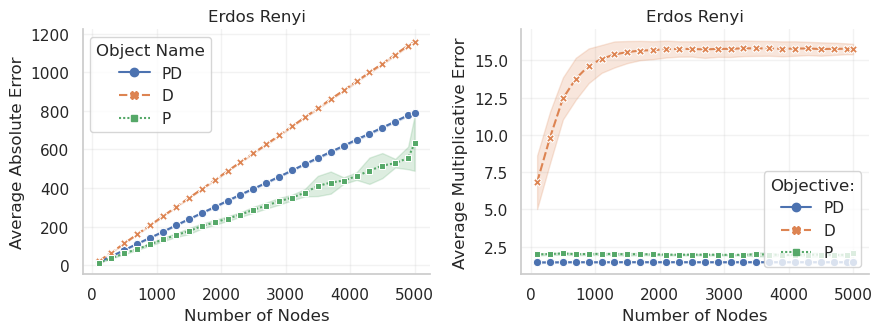

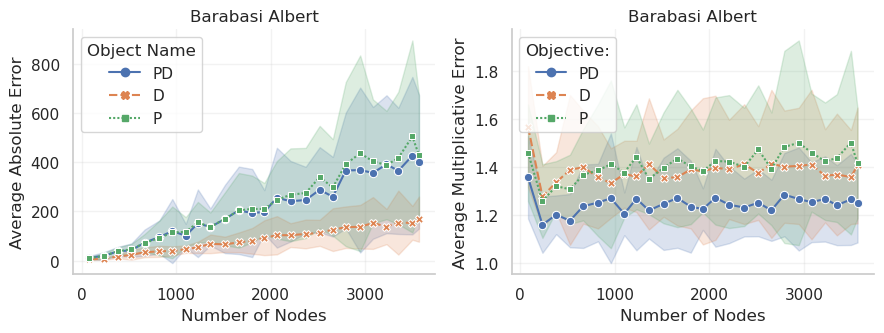

In [12]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

save = True

sns.set(style="whitegrid")

# Path to the directory containing the files
path = "/data/big/fcinus/QED/data/processed-labelprop/"

# Use glob to find all files that contain "size" in their name
for experiment in ["size", "size2"]:
    file_pattern = path + f"*-{experiment}-*.csv"
    files = glob.glob(file_pattern)

    # Build unique dataframe
    dataframes = []
    for file in files:
        df = pd.read_csv(file)
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)
    #combined_df['obj_name'].apply(lambda x: {"PD": }[x])

    # Create the figure and the axes for subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3.5))

    # Plot for optimization_error
    sns.lineplot(
        data=combined_df,
        x="network_nodes",
        y="optimization_error",
        hue="obj_name",
        style="obj_name",
        markers=True,
        errorbar="sd",
        ax=axes[0]
    )
    title = "Erdos Renyi" if experiment == "size" else "Barabasi Albert"
    axes[0].set_title(title)
    axes[0].set_xlabel('Number of Nodes')
    axes[0].set_ylabel('Average Absolute Error')
    axes[0].legend(title='Object Name', loc="upper left")
    axes[0].grid(alpha=.25)

    # Plot for relative_optimization_error
    sns.lineplot(
        data=combined_df,
        x="network_nodes",
        y="relative_optimization_error",
        hue="obj_name",
        style="obj_name",
        markers=True,
        errorbar="sd",
        ax=axes[1],
    )
    title = "Erdos Renyi" if experiment == "size" else "Barabasi Albert"
    axes[1].set_title(title)
    axes[1].set_xlabel('Number of Nodes')
    axes[1].set_ylabel('Average Multiplicative Error')
    #axes[1].set_yscale("log")
    loc = "lower right" if experiment == "size" else "upper left"
    axes[1].legend(title='Objective:', loc=loc)
    axes[1].grid(alpha=.25)

    sns.despine()
    plt.tight_layout()
    if save:
        FIGURES_PATH = "../draft/figures/"
        plt.savefig(FIGURES_PATH + f'exp-size-{df.network_name.unique()[0]}-{df.opinion_model.unique()[0]}.pdf', bbox_inches='tight', format='pdf', dpi=300)
    plt.show()


---------

# RQ 6 Number sensors real data

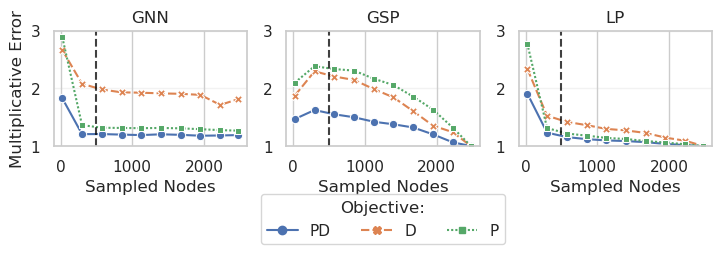

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

save = True
network = "referendum"
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8.5, 1.5))

for i, (recmethod, display_name) in enumerate([("gnn", "GNN"), ("gsignal", "GSP"), ("labelprop", "LP")]):
    df = pd.read_csv(f"../data/processed-{recmethod}/results-real-sensors-{network}-nodes2479.csv")
    sns.lineplot(df, x='n_sensors', 
                 y='relative_optimization_error', 
                 hue='obj_name',
                 style="obj_name",
                 markers=True,
                 errorbar="sd",
                 ax=axes[i],
    )
    axes[i].axvline(0.2*2479, color="black", linestyle="--", alpha=.75)
    axes[i].set_title(display_name)
    if i == 0:
        axes[i].set_ylabel('Multiplicative Error')
    else:
        axes[i].set_ylabel('')
    axes[i].set_xlabel('Sampled Nodes')
    axes[i].set_ylim(1, 3)
    axes[i].grid(axis='y', alpha=.25)  # Ensure y-axis grid is visible
    if i == 1:
        axes[i].legend(title='Objective:', loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.35))
    else:
        axes[i].legend().set_visible(False)


#plt.tight_layout(rect=[0, 0, 1, 0.95])
if save:
    FIGURES_PATH = "../draft/figures/"
    plt.savefig(FIGURES_PATH + f'exp-sensors-{network}.pdf', bbox_inches='tight', format='pdf', dpi=300)
plt.show()


# RQ 6 Number of sensors Synthetic

/tmp/ipykernel_2372802/1174687154.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  obj_subset = obj_subset.groupby(['n_frequencies', 'n_sensors']).mean().reset_index()
/tmp/ipykernel_2372802/1174687154.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = obj_subset.pivot('n_frequencies', 'n_sensors', 'relative_optimization_error')
/tmp/ipykernel_2372802/1174687154.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  obj_subset = obj_subset.groupby(['n_frequencies', 'n_sensors']).mean().reset_index()
/tmp/ipykernel_2372802/1174687154.p

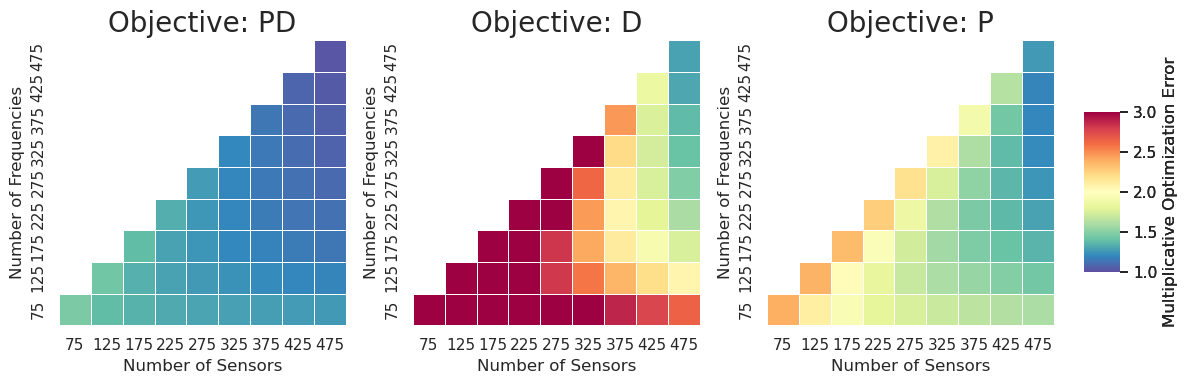

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# settings
save = True
pol, opinion_model = (3., "gaussian")

# loading
df = pd.read_csv("../data/processed-gsignal/results-sensors-erdos-nodes500.csv")
sns.set(style="whitegrid")
subset_df = df[(df['opinion_model'] == opinion_model) & (df['polarization'] == pol)]

# Determine the overall min and max for colorbar limits
vmin = 1 # subset_df['relative_optimization_error'].min()
vmax = 3 # subset_df['relative_optimization_error'].max()

# Create a 2D heatmap
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot each objective
for ax, obj_name in zip(axes, subset_df['obj_name'].unique()):
    obj_subset = subset_df[subset_df['obj_name'] == obj_name]
    obj_subset = obj_subset.groupby(['n_frequencies', 'n_sensors']).mean().reset_index()
    pivot_table = obj_subset.pivot('n_frequencies', 'n_sensors', 'relative_optimization_error')
    
    sns.heatmap(pivot_table, ax=ax, cmap='Spectral_r', vmin=vmin, vmax=vmax, 
                linewidths=0.5, linecolor='white',
                cbar_ax=fig.add_axes([.91, .3, .03, .4]), cbar_kws={'label': 'Multiplicative Optimization Error'})
    
    # Set axis labels
    ax.set_ylabel('Number of Frequencies')
    ax.set_xlabel('Number of Sensors')

    ax.invert_yaxis()

    
    # Set title
    ax.set_title(f'Objective: {obj_name}', fontsize=20)
    
# Adjust layout
plt.tight_layout(rect=[0, 0, .9, 1])
if save:
    FIGURES_PATH = "../draft/figures/"
    plt.savefig(FIGURES_PATH + f'exp-sensors-{df.network_name.unique()[0]}-opinions_{opinion_model}-pol_{pol}.pdf', bbox_inches='tight', format='pdf', dpi=300)
plt.show()


-------

# RQ 1: Opt Real Data

In [15]:
save = False
recmethod = "labelprop"

dataframes = []
# 1 files
for network_name, data_name in [("vaxNoVax", "results-real-data-vaxNoVax-nodes11632"), 
                                ("brexit", "results-real-data-brexit-nodes7281"), 
                                ("referendum", "results-real-data-referendum-nodes2479")]:
    df = pd.read_csv(f"/data/big/fcinus/QED/data/processed-{recmethod}/{data_name}.csv")

    # 1.1 Formatting
    df['method'] = df['method'].apply(lambda x: x.replace("_", " "))
    # 1.2. Lipschitz bounds * 2 (due to propagation of error see proposition)
    D_bound = lambda G, error: 2 * (1 + max(dict(G.degree()).values())) * error # max of the sum of the in and out
    P_bound = lambda _G, error: 2 * 2 * error
    PD_bound = lambda _G, error: 2 * 1 * error
    bound_functions = {
        'P': P_bound,
        'PD': PD_bound,
        'D': D_bound
    }
    import sys
    sys.path += ['../src/', '../config/']
    from generative_graph_models import define_graph_instance
    __A_eq, graph, __L_eq = define_graph_instance(network_name, kwargs={}, directed=True)
    df['bound'] = df.apply(lambda row: bound_functions[row['obj_name']](graph, row['reconstr_error']), axis=1)
    dataframes.append(df)

# 2. Combine DFs
combined_df = pd.concat(dataframes, ignore_index=True)



# 4. Params
save = True

# 5 Build display of tables
columns = ['network_name', 'network_nodes', "obj_name", 
           "relative_optimization_error", "optimization_error", "bound", "method"]


# 6. Appendix (uniform) and main config (polarized)
_ = combined_df[columns]


# 6.1 Create new columns with formatted error values
def format_error3(x): return f"\\({x:.2f}\\)"
def format_error0(x): return f"\\({x:.0f}\\)"
_['Absolute Error'] = _.apply(lambda row: format_error0(row['optimization_error']), axis=1)
_['Multiplicative Error'] = _.apply(lambda row: format_error3(row['relative_optimization_error']), axis=1)
_.rename(columns={"obj_name": "objective", "network_name": "network",  "network_nodes": "|V|", "method": "Sel Method"}, inplace=True)

# 6.2 Pivot the DataFrame to the desired format
table = _.pivot_table(
    index=['objective', 'network', '|V|'],
    columns='Sel Method',
    values=['Absolute Error', 'Multiplicative Error'],
    aggfunc='first'
)

# 6.3 Sort the DataFrame by 'objective' and then by '$|V|$'
custom_order = ['P', 'D', 'PD'] # Define custom order for 'objective' column
table_reset = table.reset_index() # Reset index to make 'objective' a column
table_reset['objective'] = pd.Categorical(table_reset['objective'], categories=custom_order, ordered=True) # Define the 'objective' column as a categorical
table_sorted = table_reset.sort_values(by=['objective', '|V|']) # Sort the DataFrame by 'objective' and then by '$|V|$'
table_sorted.set_index(['objective', 'network', '|V|'], inplace=True) # Set the index back to the original state

# 6.4 Format for latex conversion
display(table_sorted)

# 6.5 Save
if save:
    column_format = "|".join(["c"] * (len(table.columns.levels[0]) * len(table.columns.levels[1]) + 3))  # +3 for the index columns (objective, network, $|V|$)
    # Generate LaTeX code
    latex_code = table_sorted.to_latex(index=True, column_format=f"|c|c|c|{column_format}|", escape=False)
    filename = f"REALDATA-recmethod_{recmethod}"
    with open(f'../draft/tables/realdata-recmethod_{recmethod}.tex', 'w') as f:
        f.write(latex_code)




Loading vaxNoVax follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 15736
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 11760
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 11636
Graph is directed True,  |V|=11_632,  |E|=1_599_220


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading brexit follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 7589
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 7282
Graph is directed True,  |V|=7_281,  |E|=530_607


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


Loading referendum follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 2894
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 2485
Graph is directed True,  |V|=2_479,  |E|=154_831


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')
/tmp/ipykernel_2372802/830364282.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _['Absolute Error'] = _.apply(lambda row: format_error0(row['optimization_error']), axis=1)
/tmp/ipykernel_2372802/830364282.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _['Multiplicative

Absolute Error                              \
Sel Method                 closeness centrality   degree pagerank    random   
objective network    |V|                                                      
P         referendum 2479               \(246\)  \(124\)  \(116\)   \(149\)   
          brexit     7281               \(703\)  \(715\)  \(706\)   \(825\)   
          vaxNoVax   11632              \(604\)  \(672\)  \(608\)  \(1003\)   
D         referendum 2479                \(65\)   \(48\)   \(51\)    \(60\)   
          brexit     7281               \(569\)  \(581\)  \(558\)   \(726\)   
          vaxNoVax   11632              \(336\)  \(360\)  \(337\)   \(611\)   
PD        referendum 2479               \(228\)  \(154\)  \(166\)   \(218\)   
          brexit     7281               \(454\)  \(491\)  \(466\)   \(706\)   
          vaxNoVax   11632              \(585\)  \(667\)  \(551\)  \(1169\)   

                           Multiplicative Error                                
Sel Method                 closeness centrality    degree  pagerank    random  
objective network    |V|                                                       
P         referendum 2479              \(1.44\)  \(1.22\)  \(1.21\)  \(1.27\)  
          brexit     7281              \(1.74\)  \(1.76\)  \(1.75\)  \(1.87\)  
          vaxNoVax   11632             \(1.37\)  \(1.41\)  \(1.37\)  \(1.61\)  
D         referendum 2479              \(1.57\)  \(1.42\)  \(1.44\)  \(1.52\)  
          brexit     7281              \(2.06\)  \(2.08\)  \(2.04\)  \(2.35\)  
          vaxNoVax   11632             \(1.41\)  \(1.44\)  \(1.41\)  \(1.74\)  
PD        referendum 2479              \(1.23\)  \(1.16\)  \(1.17\)  \(1.22\)  
          brexit     7281              \(1.18\)  \(1.19\)  \(1.18\)  \(1.28\)  
          vaxNoVax   11632             \(1.14\)  \(1.16\)  \(1.13\)  \(1.28\)

/tmp/ipykernel_2372802/830364282.py:75: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = table_sorted.to_latex(index=True, column_format=f"|c|c|c|{column_format}|", escape=False)


## RQ 5: sampling strategies: uses previous combined_df

In [16]:
# 4. Params
save = True
recmethod = "labelprop"


# 5 Build display of tables
# Function to format the error values
def format_error3(mean): return f"\\({mean:.2f}\\)"
def format_error0(mean): return f"\\({mean:.0f}\\)"

columns = ['network_name', 'network_nodes', "obj_name", 
           "relative_optimization_error", 
           "optimization_error", "bound", "method"]


# 6. Appendix (uniform) and main config (polarized)
_ = combined_df[columns]


# 6.1 Create new columns with formatted error values
_['Absolute Error'] = _.apply(lambda row: format_error0(row['optimization_error']), axis=1)
_['Multiplicative Error'] = _.apply(lambda row: format_error3(row['relative_optimization_error']), axis=1)
_.rename(columns={"obj_name": "objective", "network_name": "network", "network_nodes": "|V|", "method": "Sel Method"}, inplace=True)

# 6.2 Pivot the DataFrame to the desired format
table = _.pivot_table(
    index=['objective', 'network', '|V|'],
    columns='Sel Method',
    values=['Absolute Error', 'Multiplicative Error'],
    aggfunc='first'
)

# 6.3 Sort the DataFrame by 'objective' and then by '$|V|$'
custom_order = ['P', 'D', 'PD'] # Define custom order for 'objective' column
table_reset = table.reset_index() # Reset index to make 'objective' a column
table_reset['objective'] = pd.Categorical(table_reset['objective'], categories=custom_order, ordered=True) # Define the 'objective' column as a categorical
table_sorted = table_reset.sort_values(by=['objective', '|V|']) # Sort the DataFrame by 'objective' and then by '$|V|$'
table_sorted.set_index(['objective', 'network', '|V|'], inplace=True) # Set the index back to the original state

# 6.4 Format for latex conversion
display(table_sorted)

# 6.5 Save
if save:
    column_format = "|".join(["c"] * (len(table.columns.levels[0]) * len(table.columns.levels[1]) + 3))  # +3 for the index columns (objective, network, $|V|$)
    # Generate LaTeX code
    latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)
    filename = f"REALDATA-STRATEGIES-recmethod_{recmethod}"
    with open(f'../draft/tables/{filename}.tex', 'w') as f:
        f.write(latex_code)


/tmp/ipykernel_2372802/880263937.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _['Absolute Error'] = _.apply(lambda row: format_error0(row['optimization_error']), axis=1)
/tmp/ipykernel_2372802/880263937.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _['Multiplicative Error'] = _.apply(lambda row: format_error3(row['relative_optimization_error']), axis=1)
/tmp/ipykernel_2372802/880263937.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

Absolute Error                              \
Sel Method                 closeness centrality   degree pagerank    random   
objective network    |V|                                                      
P         referendum 2479               \(246\)  \(124\)  \(116\)   \(149\)   
          brexit     7281               \(703\)  \(715\)  \(706\)   \(825\)   
          vaxNoVax   11632              \(604\)  \(672\)  \(608\)  \(1003\)   
D         referendum 2479                \(65\)   \(48\)   \(51\)    \(60\)   
          brexit     7281               \(569\)  \(581\)  \(558\)   \(726\)   
          vaxNoVax   11632              \(336\)  \(360\)  \(337\)   \(611\)   
PD        referendum 2479               \(228\)  \(154\)  \(166\)   \(218\)   
          brexit     7281               \(454\)  \(491\)  \(466\)   \(706\)   
          vaxNoVax   11632              \(585\)  \(667\)  \(551\)  \(1169\)   

                           Multiplicative Error                                
Sel Method                 closeness centrality    degree  pagerank    random  
objective network    |V|                                                       
P         referendum 2479              \(1.44\)  \(1.22\)  \(1.21\)  \(1.27\)  
          brexit     7281              \(1.74\)  \(1.76\)  \(1.75\)  \(1.87\)  
          vaxNoVax   11632             \(1.37\)  \(1.41\)  \(1.37\)  \(1.61\)  
D         referendum 2479              \(1.57\)  \(1.42\)  \(1.44\)  \(1.52\)  
          brexit     7281              \(2.06\)  \(2.08\)  \(2.04\)  \(2.35\)  
          vaxNoVax   11632             \(1.41\)  \(1.44\)  \(1.41\)  \(1.74\)  
PD        referendum 2479              \(1.23\)  \(1.16\)  \(1.17\)  \(1.22\)  
          brexit     7281              \(1.18\)  \(1.19\)  \(1.18\)  \(1.28\)  
          vaxNoVax   11632             \(1.14\)  \(1.16\)  \(1.13\)  \(1.28\)

/tmp/ipykernel_2372802/880263937.py:47: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = table_sorted.to_latex(index=True, column_format=f"c|c|c|{column_format}", escape=False)


----------

# Degree distributions

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path += ['../src/', '../config/']
from data_loaders import load_directed_graph

def plot_degree_distribution_with_metrics(G, network_name):
    # Calculate metrics
    try:
        entropy = nx.degree_pearson_correlation_coefficient(G)  # Approximation for entropy
    except:
        entropy = -777  # If calculation fails

    #clustering_coeff = nx.average_clustering(G) if not nx.is_directed(G) else -777
    assortativity = nx.degree_assortativity_coefficient(G)

    if nx.is_directed(G):
        # In-degree distribution
        in_degrees = dict(G.in_degree())
        in_degree_counts = Counter(in_degrees.values())
        in_deg, in_freq = zip(*sorted(in_degree_counts.items()))

        # Out-degree distribution
        out_degrees = dict(G.out_degree())
        out_degree_counts = Counter(out_degrees.values())
        out_deg, out_freq = zip(*sorted(out_degree_counts.items()))

        # Plot in-degree and out-degree distribution
        plt.figure(figsize=(8, 4))
        
        # In-degree plot
        plt.subplot(1, 2, 1)
        plt.bar(in_deg, in_freq, width=0.80, color='blue')
        plt.title(f"{network_name}\nIn-degree Distribution\nEntropy: {entropy:.2f}, Assortativity: {assortativity:.2f}")
        plt.xlabel("Degree")
        plt.ylabel("Frequency")

        # Out-degree plot
        plt.subplot(1, 2, 2)
        plt.bar(out_deg, out_freq, width=0.80, color='green')
        plt.title(f"{network_name}\nOut-degree Distribution\nEntropy: {entropy:.2f}, Assortativity: {assortativity:.2f}")
        plt.xlabel("Degree")
        plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()
    else:
        # Degree distribution for undirected graph
        degrees = dict(G.degree())
        degree_counts = Counter(degrees.values())
        deg, freq = zip(*sorted(degree_counts.items()))

        plt.figure(figsize=(5, 2.5))
        plt.bar(deg, freq, width=0.80, color='blue')
        plt.title(f"{network_name}\nDegree Distribution\nEntropy: {entropy:.2f}, Assortativity: {assortativity:.2f}")
        plt.xlabel("Degree")
        plt.ylabel("Frequency")
        plt.show()

    return entropy, assortativity

# Example usage:
# G_undirected = nx.erdos_renyi_graph(100, 0.05, directed=False)
# plot_degree_distribution_with_metrics(G_undirected)

# G_directed = nx.erdos_renyi_graph(100, 0.05, directed=True)
# plot_degree_distribution_with_metrics(G_directed)


/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:168: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = normalize(nx.adjacency_matrix(G), axis=1, norm='l1')


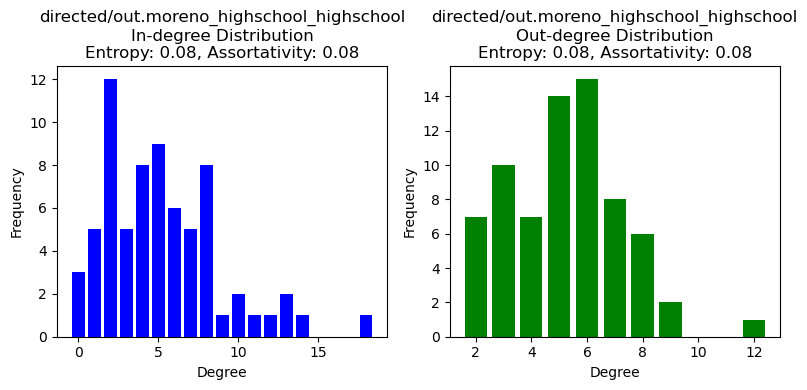

   ! Removing out-disconnected nodes.. 
  iter=0, remaining 1833
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 1050
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 950


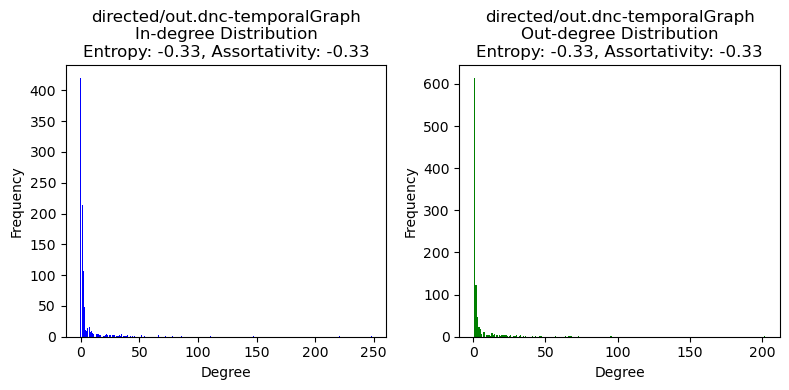

   ! Removing out-disconnected nodes.. 
  iter=0, remaining 4562
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 1398


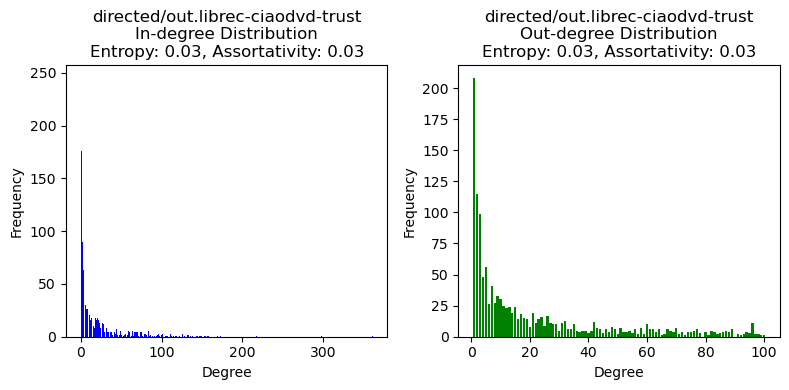

   ! Removing out-disconnected nodes.. 
  iter=0, remaining 610
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 442
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 426


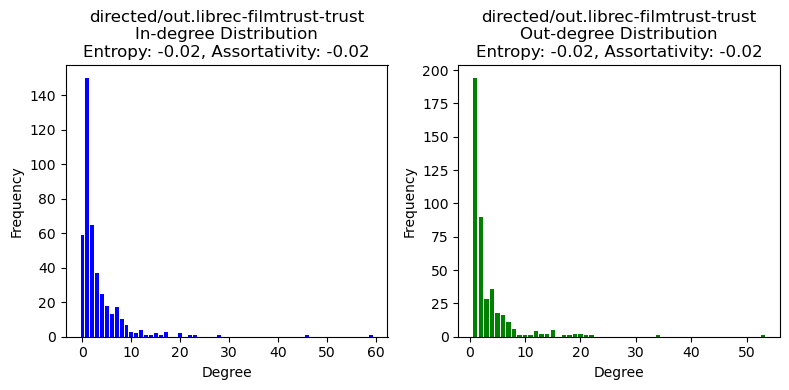

   ! Removing out-disconnected nodes.. 
  iter=0, remaining 2539
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 2313
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 2299


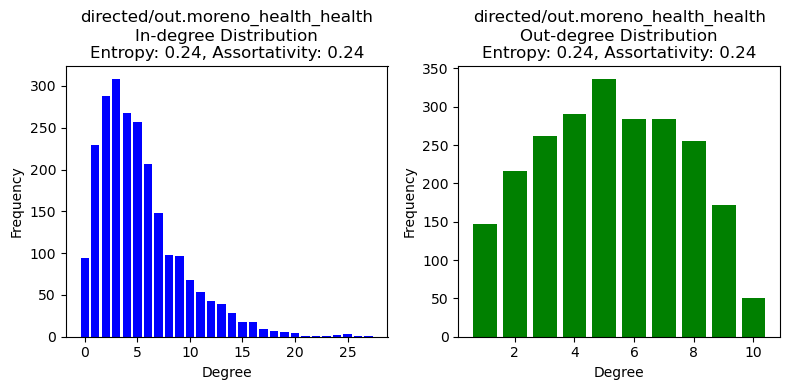

   ! Removing out-disconnected nodes.. 
  iter=0, remaining 117


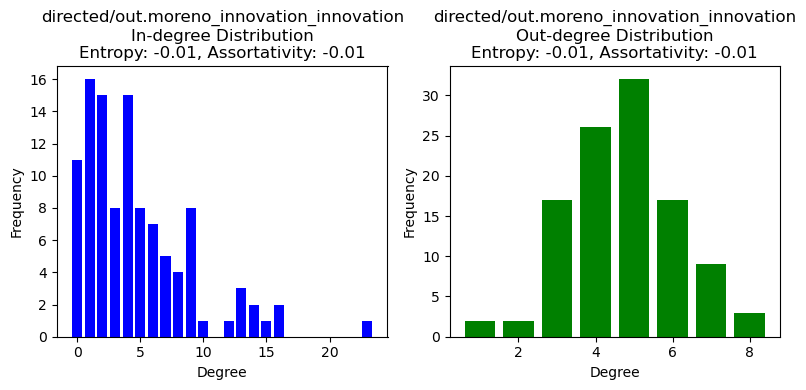

   ! Removing out-disconnected nodes.. 
  iter=0, remaining 217


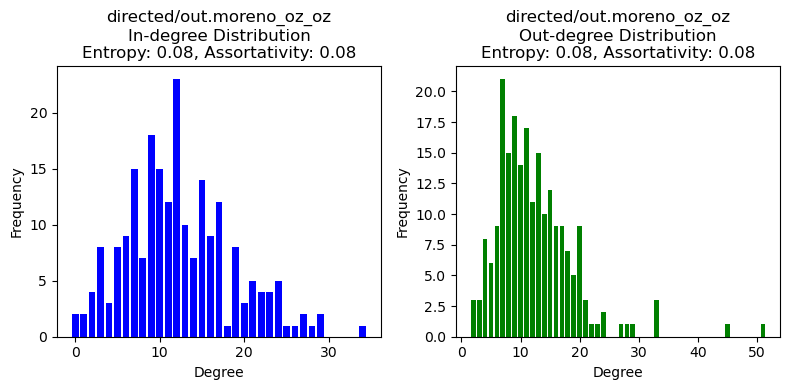

   ! Removing out-disconnected nodes.. 
  iter=0, remaining 404
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 95
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 83


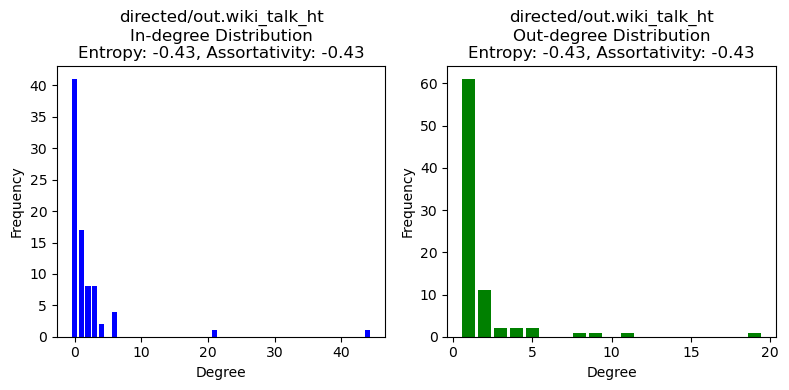

/data/big/fcinus/QED/notebooks/../src/generative_graph_models.py:170: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray().astype(np.float64), G, None


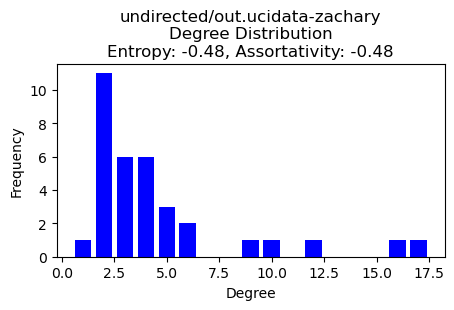

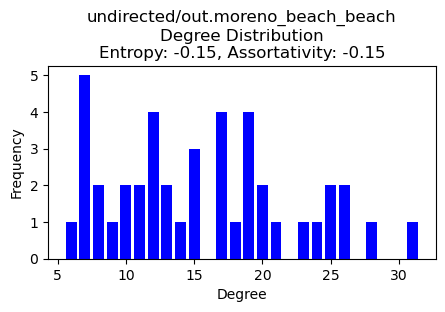

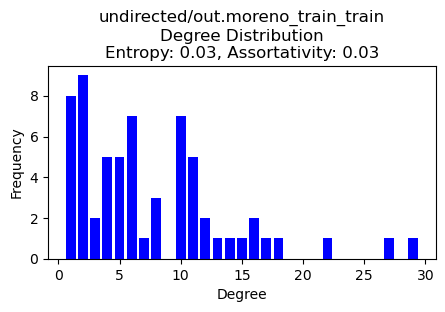

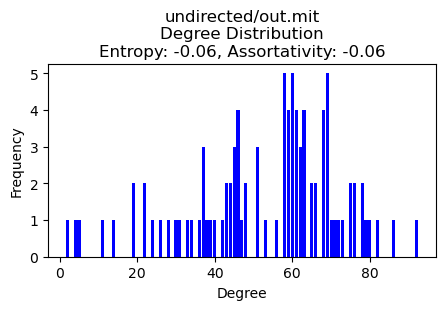

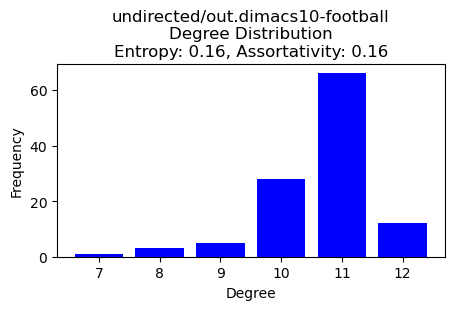

Loading brexit follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 7589
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 7282
Graph is directed True,  |V|=7_281,  |E|=530_607


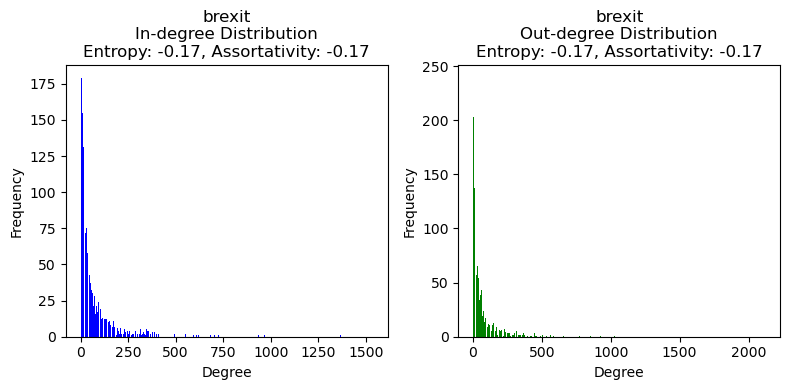

Loading referendum follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 2894
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 2485
Graph is directed True,  |V|=2_479,  |E|=154_831


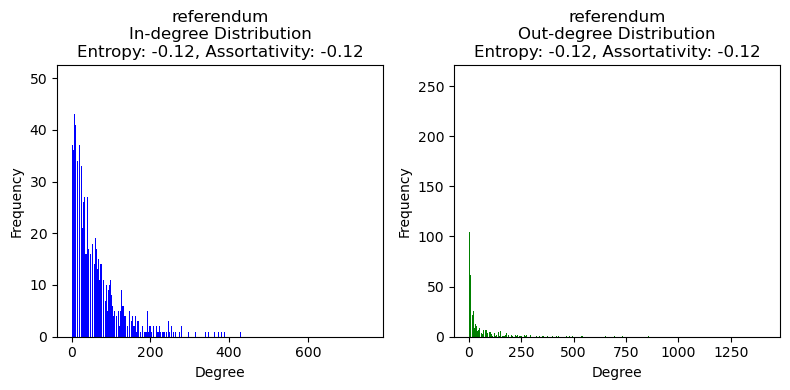

Loading vaxNoVax follow network
   ! Removing out-disconnected nodes.. 
  iter=0, remaining 15736
   ! Removing out-disconnected nodes.. 
  iter=1, remaining 11760
   ! Removing out-disconnected nodes.. 
  iter=2, remaining 11636
Graph is directed True,  |V|=11_632,  |E|=1_599_220


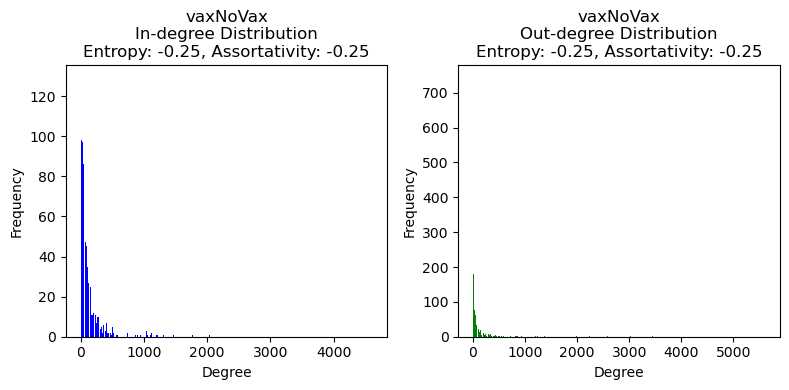

In [3]:
from generative_graph_models import define_graph_instance

NETWORKS = [('directed/out.moreno_highschool_highschool', {}),
                ('directed/out.dnc-temporalGraph', {}),
                ('directed/out.librec-ciaodvd-trust', {}),
                ('directed/out.librec-filmtrust-trust', {}),
                ('directed/out.moreno_health_health', {}),
                ('directed/out.moreno_innovation_innovation', {}),
                ('directed/out.moreno_oz_oz', {}),
                ('directed/out.wiki_talk_ht', {}),
                ('undirected/out.ucidata-zachary', {}), # 34
                ('undirected/out.moreno_beach_beach', {}), # 43
                ('undirected/out.moreno_train_train', {}), # 64
                ('undirected/out.mit', {}), # 96
                ('undirected/out.dimacs10-football', {}), # 115
                ("brexit", {}), 
                ("referendum", {}), 
                ("vaxNoVax", {})
                
]

DATA_STAT_NETWORKS = {
        'network': [],
        'entropy': [],
        # 'clustering_coeff': [],
        # 'avg_path_length': [],
        'assortativity': [],
}
for network_name, kwargs in NETWORKS:
    is_directed = not ('undirected' in network_name)
    __A_eq, G, __L_eq = define_graph_instance(network_name, kwargs=kwargs, directed=is_directed)
    entropy, assortativity = plot_degree_distribution_with_metrics(G, network_name)
    DATA_STAT_NETWORKS['network'].append(network_name)
    DATA_STAT_NETWORKS['entropy'].append(entropy)
#     DATA_STAT_NETWORKS['clustering_coeff'].append(clustering_coeff)
#     DATA_STAT_NETWORKS['avg_path_length'].append(avg_path_length)
    DATA_STAT_NETWORKS['assortativity'].append(assortativity)

In [6]:
import pandas as pd
pd.DataFrame(DATA_STAT_NETWORKS)[['network', 'assortativity']].sort_values('assortativity')

,network,assortativity
8,undirected/out.ucidata-zachary,-0.475613
7,directed/out.wiki_talk_ht,-0.431981
1,directed/out.dnc-temporalGraph,-0.326927
15,vaxNoVax,-0.254719
13,brexit,-0.169047
9,undirected/out.moreno_beach_beach,-0.146965
14,referendum,-0.123696
11,undirected/out.mit,-0.055486
3,directed/out.librec-filmtrust-trust,-0.019522
5,directed/out.moreno_innovation_innovation,-0.009700
